# Latent Space Distribution in dependence of the Scaling of Gaussian Signals

### Import Modules

In [1]:
# external modules
import torch
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import os
from PIL import Image

# internal modules
from VariationalAE_model import VariationalAutoEncoder
from dataset_VariationalAE import Dataset_1d

## 1) Load the Model

### Parameters for Net Structure and Data Generation

In [2]:
# taken from training procedure

# net parameters
latent_dimension = 2
variable_space = 20
steps = 5 # not needed 

# model params
size = 1000
generations = 10 # reduced in contrast to training
batch_size = 64 # not needed 

In [3]:
# path to file
PATH: str = "../trained_models/VariationalAE_NN.pth"
# load model 
model = VariationalAutoEncoder(latent_dimension=latent_dimension,
                    variable_space=variable_space,
                    steps=steps)
PNN_state_dict = torch.load(PATH)
model.load_state_dict(PNN_state_dict)

<All keys matched successfully>

## 2) Data Generation and Evaluating the Model

In [4]:
# same space as in the training
# TODO: see if the net parameterizes well
scales = np.linspace(0.1, 2, 100)

# results stored in a dictionary
results = {}

# iterating through scale values
for scale in scales:
    # store result in dict
    results[scale] = []
    dataset = Dataset_1d(variable_space=variable_space,
                      size=size,
                      generations=generations,
                      random_scaling=scale)
    for gen_idx in range(generations):
        # evaluate latent space for every signal
        results[scale].append(model.encoder(dataset[gen_idx]).detach().numpy())
    results[scale] = np.array(results[scale])


## 3) Plotting the Model

### 3.1) Animation of Latent Space

FileNotFoundError: [Errno 2] No such file or directory: 'frames/scale_0.1.png'

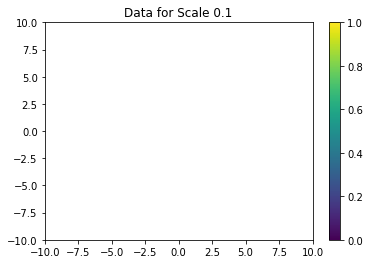

In [5]:
# for this the latent space must have two dimension
scales_normed = scales/scales.max()
# all variables
x_all = []
y_all = []
for scale_idx, scale in enumerate(scales):
    x = []
    y = []
    for index, latent_space_coordinates in enumerate(results[scale]):
        x.append(latent_space_coordinates[0])
        y.append(latent_space_coordinates[1])

    plt.scatter(x,y, c=np.ones_like(x) * scales_normed[scale_idx])
    if scale_idx > 0:
        plt.scatter(np.array(x_all).reshape(10 * (scale_idx)), np.array(y_all).reshape(10* (scale_idx)), alpha=0.3, c="red")
    plt.title(f"Data for Scale {round(scale, 2)}")
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.colorbar()
    plt.clim(vmin=0.0, vmax=1.0)
    plt.savefig(f"../frames/scale_{round(scale,2)}.png")
    plt.clf()

    x_all.append(x)
    y_all.append(y)

# after iterating full
x_all = np.array(x_all).reshape((10* 100,))
y_all = np.array(y_all).reshape((10* 100,))
plt.scatter(x_all,y_all)
plt.title(f"Full Scale")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.colorbar()
plt.clim(vmin=0.0, vmax=1.0)
plt.savefig(f"../frames/scale_full.png")
plt.clf()

### Stack the Frames

In [20]:
frames = np.stack([iio.imread(f"../frames/scale_{round(scale,2)}.png") for scale in scales ], axis=0)
# include all point in last frame
frame_shape = list(frames.shape)
frame_shape[0] = frame_shape[0] + 1
frames_including_track = np.empty(shape=frame_shape)
frames_including_track[:-1,:,:,:] = frames
frames_including_track[-1,:,:,:] = Image.fromarray(iio.imread("../frames/scale_full.png"), mode="RGBA") # TODO: Does not work yet
iio.imwrite('../animations/VariationalAE_scale_formation.gif', frames)

### Delete Frames

In [ ]:
if os.system(command="rm -rf ../frames/*") == 0:
    print("Successfullly deleted all frames.")

Successfullly deleted all frames.
